# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

## Question 1

Use [World Bank's Data Service](https://data.worldbank.org/) to retrieve

* Literacy rates of women (percentage of females ages 15 and above)
* Child mortality rate, under 5 year old. (per 1,000 live births)
* Gini index (Economic Inequality)

1. Plot each dataset for Turkey from earliest date available until this year.
2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 
3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?
4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

We start off by importing the necessary libraries. Since there is a Python wrapper made for the World Bank Data API I decided to use that instead of urlopen for Q1. Pandas and Matplotlib are imported as they are needed as well.

In [225]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

I found the indicators of the respective datasets on [World Bank's Data Service](https://data.worldbank.org/) and acquired the three required datasets using the wbgapi module.

In [226]:
lr = wb.data.DataFrame('SE.ADT.LITR.FE.ZS')
cmr = wb.data.DataFrame('SH.DYN.MORT')
gini = wb.data.DataFrame('SI.POV.GINI')

We will need [ISO 3166-1 alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) codes of all the countries so I will just set them each to a variable in a more human-readable variable.

In [227]:
turkey = 'TUR'
others = ['GRC','BGR','ROU','POL','SYR']

In [228]:
lr

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.812683,NaN,NaN,NaN
AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.60078
AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53.407211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.58625,NaN,93.073059,93.408028,NaN,86.458633,NaN,94.533173,NaN,NaN


In [229]:
cmr

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.250071,74.816673,71.794958,69.138157,66.515928,64.243994,62.072936,60.054150,58.158650,NaN
AFG,358.2,352.2,346.3,340.6,335.1,329.8,324.4,318.8,313.3,307.9,...,80.300000,76.900000,73.600000,70.400000,67.500000,64.800000,62.300000,60.100000,58.000000,NaN
AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,114.997108,112.191190,109.696287,107.291693,104.637694,102.032086,99.291140,96.494289,93.627023,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.100000,98.500000,92.900000,88.100000,84.100000,80.600000,77.300000,74.200000,71.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,429.7,422.7,415.5,407.8,399.6,390.2,379.7,368.2,356.0,343.2,...,58.800000,58.400000,58.700000,60.700000,60.300000,60.200000,61.600000,61.500000,59.600000,NaN
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.500000,39.300000,37.600000,36.300000,35.200000,34.600000,33.900000,33.000000,32.200000,NaN


In [230]:
gini

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,26.3,27.3,26.5,26.7,29.0,NaN,NaN,NaN,NaN
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As it can be seen the DataFrames are constructed such that every row represents a countries(economy) timeseries data points with each column representing the respective year. I think that if we transpose the index and the columns using the *transpose* function it would look nicer and be easier to work with. So let's do that for each dataset.

In [231]:
def transpose_data(df):
    if df.index.name == 'economy':
        tdf = df.rename(columns=lambda x: int(x.replace('YR', '')))
        tdf = tdf.transpose()
        return tdf
    return df

In [232]:
lr = transpose_data(lr)
lr.name = 'Literacy rate, adult female'
cmr = transpose_data(cmr)
cmr.name = 'Child mortality rates, under 5 year old'
gini = transpose_data(gini)
gini.name = 'Gini index'
gini


economy,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,NaN,NaN,NaN,NaN,NaN,33.1,NaN,NaN,NaN,41.1,...,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,44.3
2018,NaN,NaN,NaN,NaN,51.3,30.1,NaN,NaN,26.0,41.3,...,NaN,35.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,30.8,NaN,NaN,NaN,42.9,...,NaN,NaN,32.3,NaN,NaN,NaN,NaN,NaN,NaN,50.3
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since we transformed all 3 dataframes to the form we are comfortable with where the years are in integer form and are the index of the respective rows, and each country has their own column let's carry on with plotting the data from Turkey. I will construct a function *plot_data* which requires two parameters *data* and *country* to query the respective country column from the dataset and plot it with *plt.plot*.

In [233]:
def plot_data(data, country):
    first, last = data[turkey].first_valid_index(), data[turkey].last_valid_index() 
    df = data[country]
    df = df.loc[first:last]
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel(data.name)
    plt.title(country)
    plt.plot(df, 'ro')
    plt.show()


After a grueling amount of trial error, I had to use the dot shape for plotting since the stand alone data points were not visible any other way.

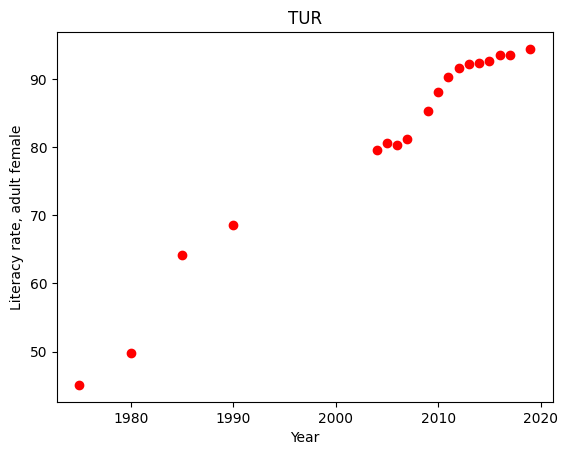

In [234]:
plot_data(lr, turkey)

Seems like literacy rate of adult females in Turkey has steadily rose to levels of >90%, good for us!

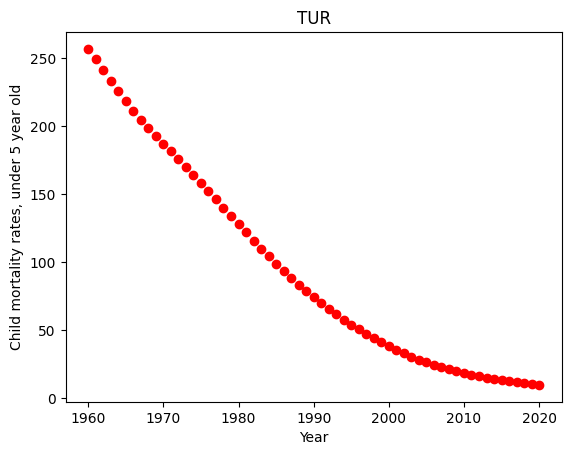

In [235]:
plot_data(cmr, turkey)

Much like the former graph this one also provides a positive outlook. Child mortality rates per 1000 births seem to be down dramatically in the last 60 years.

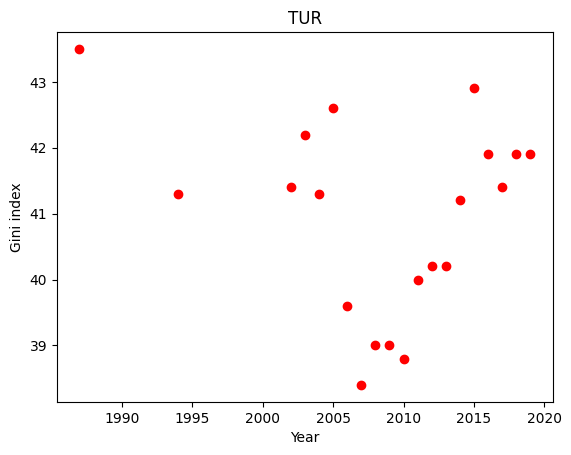

In [236]:
plot_data(gini, turkey)

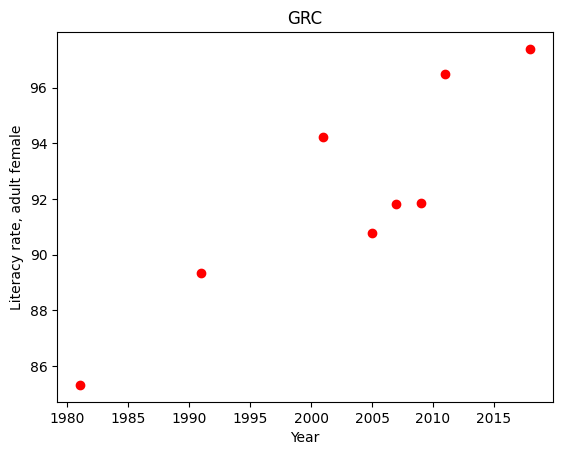

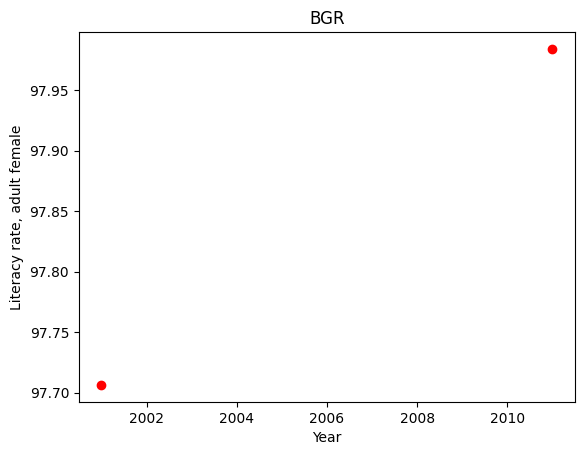

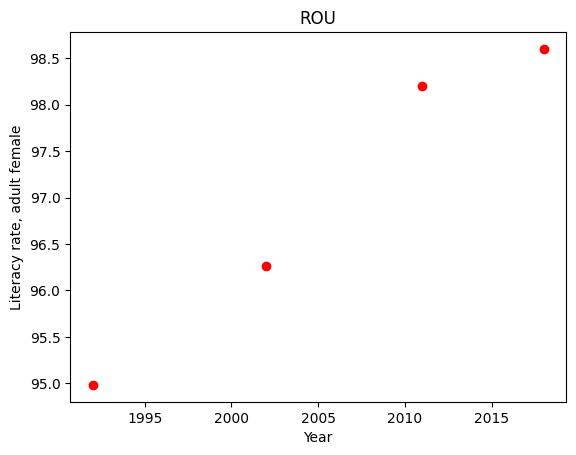

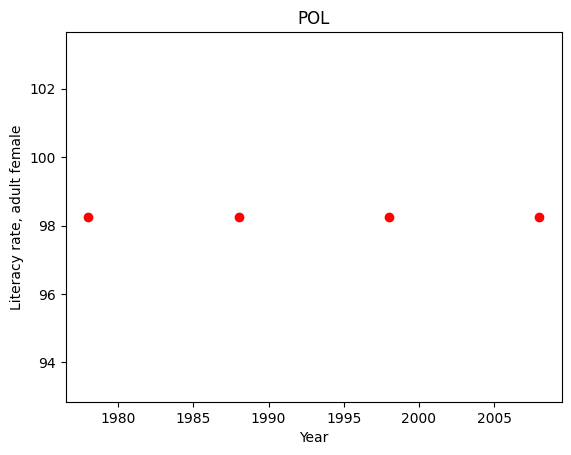

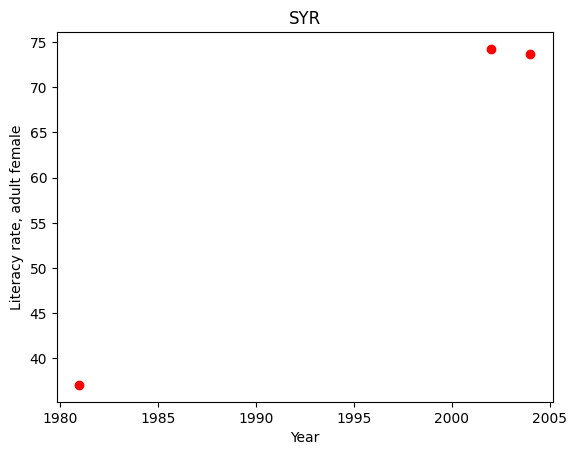

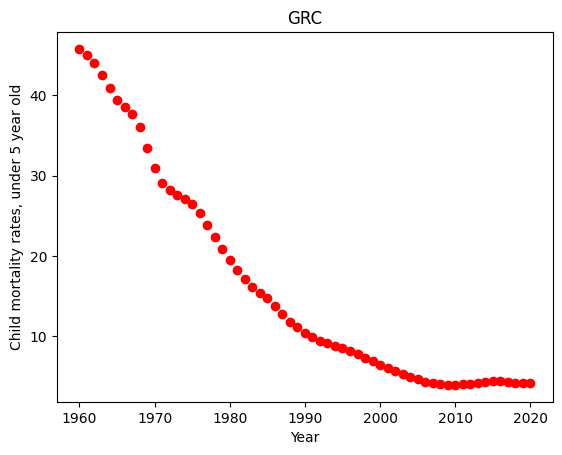

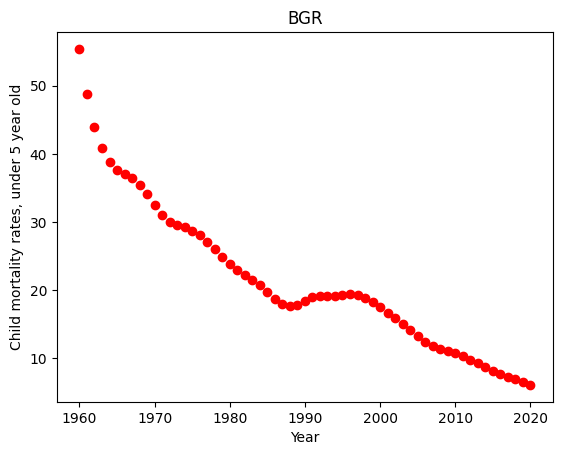

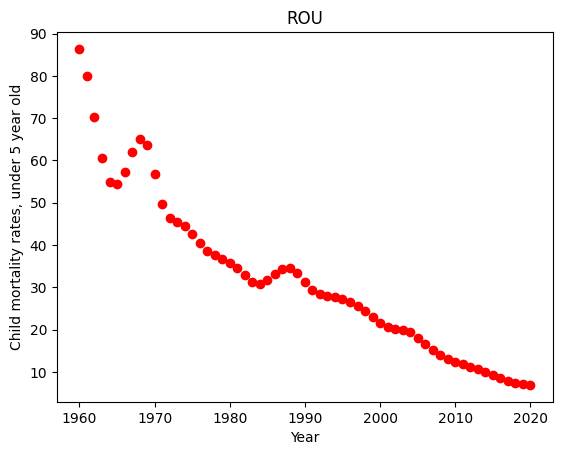

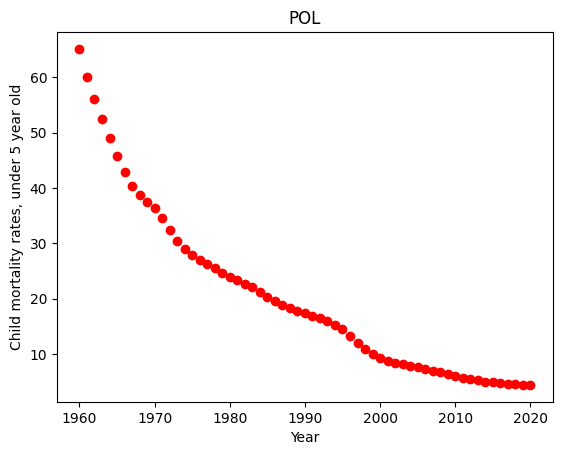

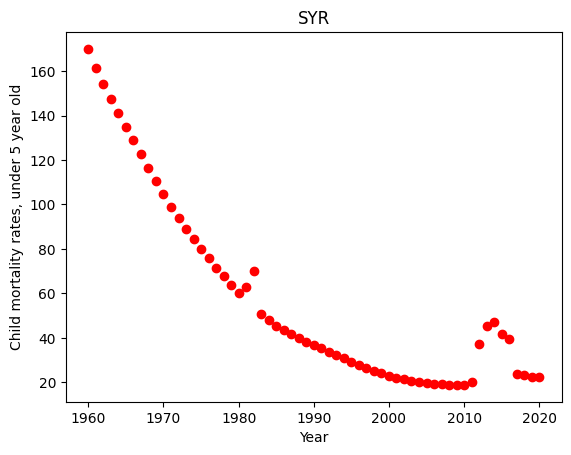

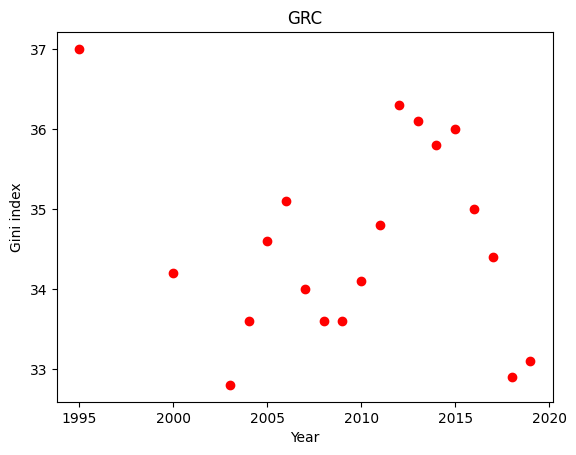

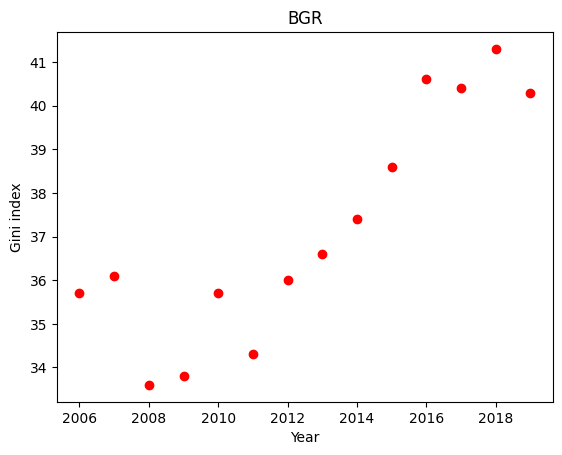

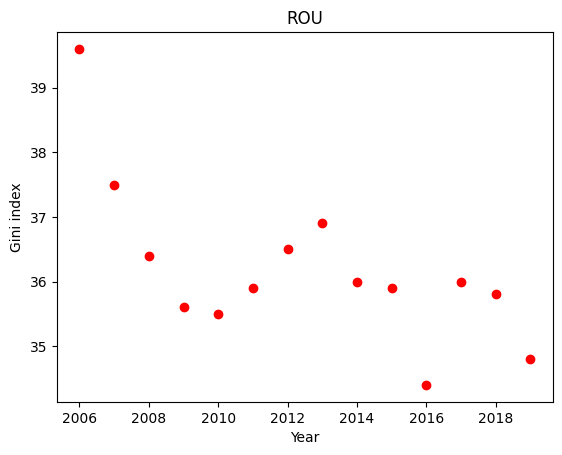

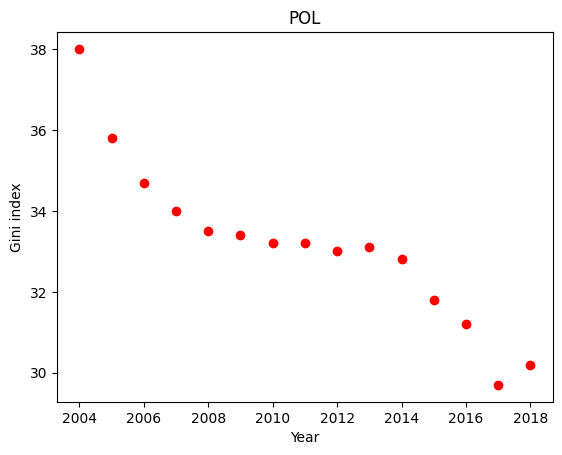

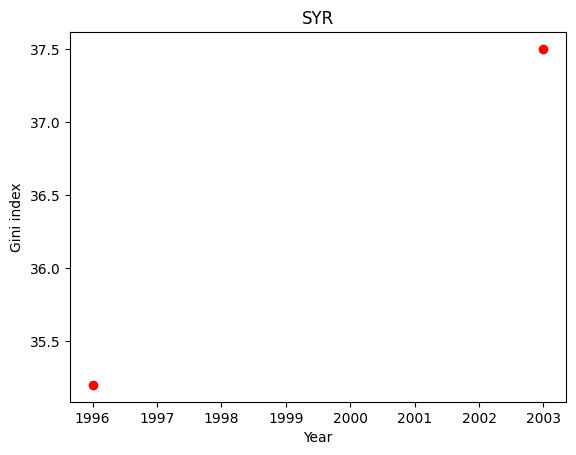

In [237]:
for dataset in [lr, cmr, gini]:
    for country in others:
        plot_data(dataset, country)

As it can be seen the literacy rate data was not recorded properly for any country so the graphs provide little to no insight. 

As for the Gini index we can see that Greece has a graph very similar looking to ours their income inequality is quite unpredictable as well, whereas Poland and Romania has been lowering theirs steadily which means the wealth gap in each country is getting smaller by the year. Bulgaria however looks to have higher and higher Gini scores every year.

Child mortality rate data was the best recorded data among all 3 datasets. Romania seems to have steady down trend until 1965 when the CM rates soar and come back down the normal levels around 1970. I researched a probable cause but failed to find anyhing other than the Communist Regime losing the elections in '65 which does not seem to be a good reason for the child mortality rates to go up. 

Syrian child mortality rate graph shows us two significant years where the mortality rates seem to go up abnormally, one of which is 1980 when the Islamic uprising and the Siege of Aleppo took place. The second one is the recent Civil War which started in 2011. Both are quite tragic.

Text(0, 0.5, 'Child mortality rates, under 5 year old')

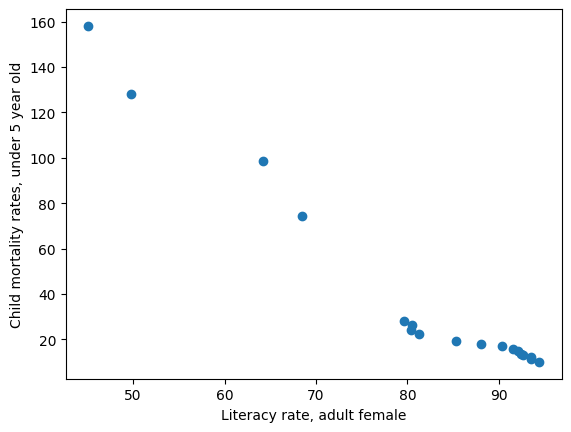

In [238]:
plt.scatter(lr[turkey], cmr[turkey])
plt.xlabel(lr.name)
plt.ylabel(cmr.name)

Even though the literacy rate data was not recorded properly for the earlier years, it is apparent that there is an inverse correlation between literacy rates of adult women and child mortality rates. However we cannot say anything statiscally without running relation tests on our hyphothesis.

Text(0, 0.5, 'Gini index')

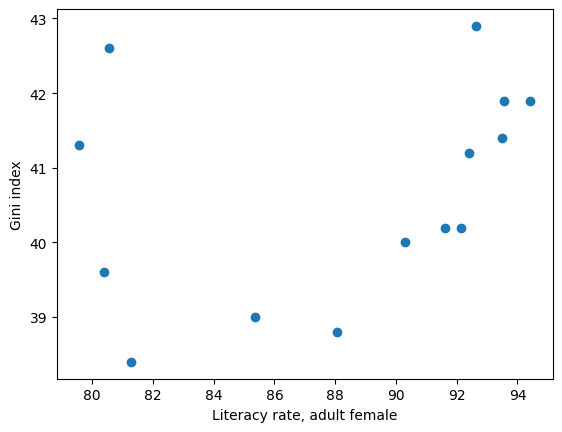

In [239]:
plt.scatter(lr[turkey], gini[turkey])
plt.xlabel(lr.name)
plt.ylabel(gini.name)

This one seems to have no correlation, probably because the Gini index is all over the place.

Text(0, 0.5, 'Gini index')

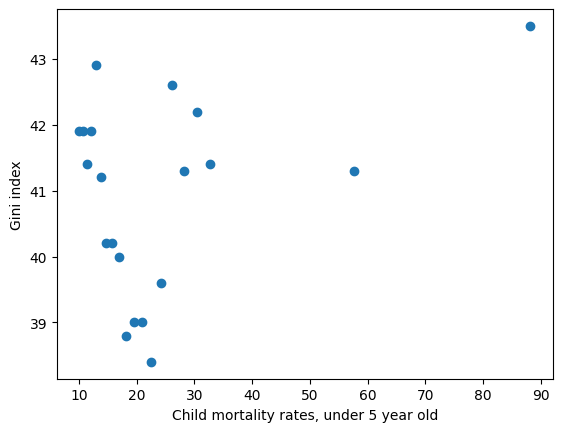

In [240]:
plt.scatter(cmr[turkey], gini[turkey])
plt.xlabel(cmr.name)
plt.ylabel(gini.name)

Even though the scatter plot does not show a strong correlation, the Gini index seems to be the highest when the child mortality rates are the highest so if I had to I would guess these two parameters have weak and positive correlation.

## Question 2

Use Istanbul Municipality Data Server to retrieve the data on [Rail Transportation Data](https://data.ibb.gov.tr/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari).

1. Explore the dataset and explain each column.
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.
3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.
4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form

    {Station Name: probability that the specific age bracket uses the station}
5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.
6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

In [111]:
from urllib.request import urlopen

In [187]:
with urlopen('https://data.ibb.gov.tr/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/7aec630d-2757-4da0-97f1-71b140abd818/download/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx') as url:
    data = pd.read_excel(url.read())
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,<20


In [188]:
data.columns

Index(['passage_cnt', 'passanger_cnt', 'transaction_year', 'transaction_month',
       'line', 'station_name', 'station_number', 'town', 'latitude',
       'longitude', 'Age-Group'],
      dtype='object')

Most of the columns are quite self-explanatory but here is a quick breakdown on all 11 columns:
- passage_cnt: count of passages without regard to the uniqueness of the passenger
- passanger_cnt: count of unique passengers (small typo in the word passenger)
- transaction_year: year of the transaction
- transaction_month: month of the transaction
- line: name of the line
- station_name: name of the station
- station_number: seems to be the code for the station no idea why they titled it number
- town: town of the station (should've been district instead of town)
- latitude: well, latitude of the station
- longitude: longitude of the station

Let's solve the coordinate issue before starting to work with the data. I will convert the coordinate data to string then parse the first two characters add a dot inbetween the first two chars and the rest then cast the variable to double before returning. This is an easy fix since we know Istanbul coordinates are always going to be close to 41 and 28.

In [189]:
def convert_to_coord(x):
    if type(x) == int:
        xs = str(x)
        w = xs[:2]
        d = xs[2:]
        xc = w + '.' + d
        return float(xc)
    return x

In [190]:
data['latitude'] = data['latitude'].apply(convert_to_coord)
data['longitude'] = data['longitude'].apply(convert_to_coord)
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,<20


After doing some manipulation on the data and creating two dataframes where one held the total passenger count for the given station and the other held the coord. data I found out nearly 10 stations didn't have coordinate data so I decided to apply *dropna* carrying on so that I won't have to deal with mismatching sizes when joining the aforementioned dataframes.

In [191]:
data.dropna(inplace=True)
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,<20


In [192]:
slc = data.groupby('station_name').sum(numeric_only=True).drop(labels=['passage_cnt', 'transaction_year', 'transaction_month'], axis=1)
psd = data[['station_name', 'latitude','longitude']].drop_duplicates()
slc.reset_index(inplace=True)
df = pd.merge(slc, psd, how='inner')
df

,station_name,passanger_cnt,latitude,longitude
0,4 Levent 2 Güney,978.156,41.085722,29.006861
1,4 Levent Kuzey,1253.533,41.085722,29.006861
2,AKSARAY,2445.726,41.011833,28.947889
3,AKSARAY 1,805.858,41.011833,28.947889
4,ALTINŞEHİR,2832.002,41.016694,29.140111
...,...,...,...,...
270,Şehitlik,1409.887,41.034278,28.928333
271,Şişhane Güney,1005.997,41.028722,28.974889
272,Şişhane Kuzey,1383.547,41.028722,28.974889
273,Şişli 2 Kuzey,3515.905,41.063889,28.992139


In [193]:
df = df[~df.longitude.str.contains('NULL', na=False)]
df = df[~df.latitude.str.contains('NULL', na=False)]
df = df.rename(columns={'passanger_cnt':'level'})

In [194]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

In [195]:
df['latitude']

0      41.085722
1      41.085722
2      41.011833
3      41.011833
4      41.016694
         ...    
270    41.034278
271    41.028722
272    41.028722
273    41.063889
274    41.063889
Name: latitude, Length: 246, dtype: float64

In [196]:
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

In [197]:
df[df['longitude'].isnull()]

,station_name,level,latitude,longitude
233,Yenisahra,1440.406,40.984556,NaN


In [198]:
df.dropna(axis=0, subset=['longitude'], inplace=True)

In [199]:
from sklearn.preprocessing import minmax_scale
import folium

In [200]:
map = folium.Map(location=[41, 29], zoom_start=10)
fg = folium.FeatureGroup(name="My Map")

lat = list(df["latitude"])
long = list(df["longitude"])
intensity = minmax_scale(df['level'], feature_range=(10, 50))

for lt,ln,i in zip(lat,long, intensity):
    fg.add_child(folium.CircleMarker(location = [lt,ln],
                               radius = i,
                               color = 'black',
                               fill_color='red',
                               fill_opacity = 0.6))

map.add_child(fg)

In [248]:
ad = data[['station_name', 'Age-Group', 'passanger_cnt']]
ad = ad.rename(columns={'station_name':'station', 'Age-Group':'age', 'passanger_cnt': 'pcount'})
s = '4 Levent 2 Güney'
age = '20-30'
ad[(ad.age == age)]['pcount'].sum()

104253.402

In [251]:
stations = set(ad['station'])

res = {}
def get_dist(age):
    total = ad[(ad.age == age)]['pcount'].sum()
    for s in stations:
        spcount = ad[(ad.station == s) & (ad.age == age)]['pcount'].sum()
        prob = spcount / total
        res[s] = prob
    return res    

In [252]:
d = get_dist('20-30')

In [253]:
d

{'GÖZTEPE DOĞU': 0.0004028261830726636,
 'Altunizade 1': 0.005318003915114443,
 'Kadıköy (Batı)': 0.004424364012600759,
 'NECİP FAZIL': 0.001856697203991482,
 'Florya aqua': 0.0038034346351594355,
 'Yunus': 0.0008015182084897336,
 'Şişli 2 Kuzey': 0.012245547632105088,
 'BAYRAMPASA': 0.0030238917287322667,
 'Pendik (Batı)': 0.00206447939224084,
 'Vezneciler Güney': 0.0039168697823405325,
 'ATAKOY': 0.009569155354757632,
 'Seyrantepe 3 Stad Girişi': 0.0014810068260410342,
 'Yenikapı Kuzey': 0.01103793236406808,
 'YENIKAPI': 0.01992120122852202,
 'YEŞİLPINAR': 0.0008310999769580661,
 'Başak': 0.0006043256027270937,
 'Kazlıçeşme': 0.0032636536887304646,
 'OTOGAR': 0.0037379595535884766,
 'Huzurevi': 0.0016125037339309082,
 'Beyoğlu': 0.001287890825855256,
 '4 Levent 2 Güney': 0.0033622308075855404,
 'Tuzla': 0.0011486147953234179,
 'Güngören': 0.0033779521170925436,
 'Suadiye': 0.0025486362545751743,
 '[NULL]': 0.0007385850103961115,
 'Ziya Gökalp Mah.': 0.0003624725838682943,
 'Atatürk O

In [255]:
sum(list(get_dist('20-30').values()))

1.0

In [257]:
import scipy.stats as stats

In [273]:
age_groups = np.unique(ad['age'])
station_dist = {}
for age_group in age_groups:
    station_dist[age_group] = list(get_dist(age_group).values())

In [275]:
most_visited_stats = []
for ag in age_groups:
    dict = get_dist(ag)
    most_visited = max(dict.keys(), key=(lambda x: dict[x]))
    most_visited_stats.append(most_visited)

In [278]:
for ag, mvs in zip(age_groups, most_visited_stats):
        print('Most visited station for age group', ag, 'is', mvs)

Most visited station for age group 20-30 is NURTEPE DOĞU
Most visited station for age group 30-60 is Çayırova
Most visited station for age group 60+ is YENİMAHALLE
Most visited station for age group <20 is Küçükyalı-2
Most visited station for age group Unknown is MAHMUTBEY M7 HOL 1


In [267]:
already = []
for ag1 in age_groups:
    for ag2 in age_groups:
        if ag1 != ag2 and (ag1, ag2) not in already:
            print("Pair T-Test between the age groups of", ag1, ag2)
            print(stats.ttest_rel(station_dist[ag1], station_dist[ag2]))
            print()
            already.append((ag1, ag2))

Pair T-Test between the age groups of 20-30 30-60
Ttest_relResult(statistic=-3.307750947851351e-16, pvalue=0.9999999999999998)

Pair T-Test between the age groups of 20-30 60+
Ttest_relResult(statistic=7.2444422787266e-16, pvalue=0.9999999999999994)

Pair T-Test between the age groups of 20-30 <20
Ttest_relResult(statistic=-3.976035654956516e-16, pvalue=0.9999999999999997)

Pair T-Test between the age groups of 20-30 Unknown
Ttest_relResult(statistic=-4.730182552143184e-16, pvalue=0.9999999999999996)

Pair T-Test between the age groups of 30-60 20-30
Ttest_relResult(statistic=3.307750947851351e-16, pvalue=0.9999999999999998)

Pair T-Test between the age groups of 30-60 60+
Ttest_relResult(statistic=6.478556009946478e-16, pvalue=0.9999999999999996)

Pair T-Test between the age groups of 30-60 <20
Ttest_relResult(statistic=-4.582213176406749e-16, pvalue=0.9999999999999996)

Pair T-Test between the age groups of 30-60 Unknown
Ttest_relResult(statistic=7.961809833498201e-17, pvalue=1.0)

P

As it can be seen from the results of the pair t-tests, we fail to reject $H_{0}:$ the station choice of age groups are the same, meaning the choice of stations between age groups does not seem to differ statiscally.

# Question 3

For this question use Yahoo Finance API via [yfinance](https://pypi.org/project/yfinance/) library. Retrieve the data for Microsoft [MSFT], Apple [AAPL] and NASDAQ-100 [NDX]. from January 1, 2000.

1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 
2. Merge the series you obtain in Step 1 into a single pandas dataframe.
3. Plot the histograms of results you obtained above (use 10 bins).
4. Plot all three series in a single plot to compare. Do you see a relationship? 
5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.

In [260]:
import yfinance as yf

In [261]:
msft = yf.Ticker("MSFT")
aapl = yf.Ticker("AAPL")
ndx = yf.Ticker("NDX")

In [262]:
microsoft = msft.history(start="2000-01-01")
apple = aapl.history(start="2000-01-01")
nasdaq = ndx.history(start="2000-01-01")


<AxesSubplot: xlabel='Date'>

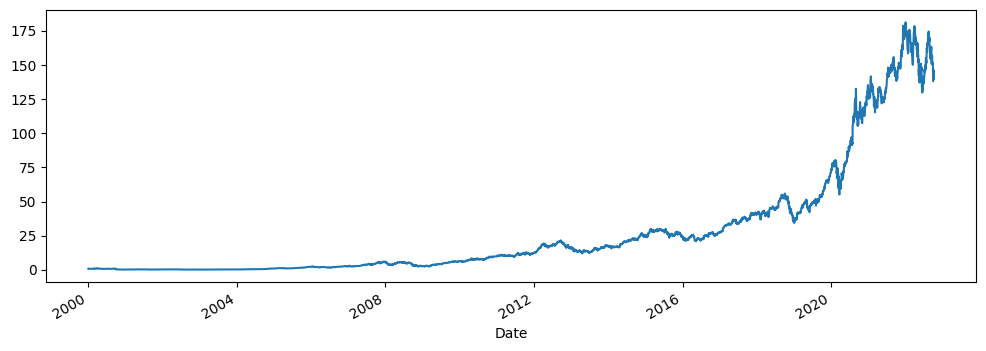

In [263]:
apple['Close'].plot(figsize=(12,4))

In [264]:
def log_return(df):
    df_lr = pd.Series(np.diff(np.log(df['Close'])))
    return df_lr

In [265]:
aapl_lr = log_return(apple)
aapl_lr

0      -0.088078
1       0.014527
2      -0.090514
3       0.046281
4      -0.017745
          ...   
5723    0.030289
5724    0.025300
5725    0.002051
5726   -0.006648
5727   -0.037410
Length: 5728, dtype: float64

In [266]:
msft_lr = log_return(microsoft)
ndx_lr = log_return(nasdaq)
data = pd.DataFrame({'MSFT':msft_lr, 'AAPL':aapl_lr, 'NDX':ndx_lr})
data.set_index(pd.Series(microsoft.index.tolist()[1:]), inplace=True)
data

,MSFT,AAPL,NDX
2000-01-04 00:00:00-05:00,-0.034364,-0.088078,-0.066635
2000-01-05 00:00:00-05:00,0.010488,0.014527,-0.011027
2000-01-06 00:00:00-05:00,-0.034072,-0.090514,-0.048636
2000-01-07 00:00:00-05:00,0.012984,0.046281,0.054971
2000-01-10 00:00:00-05:00,0.007265,-0.017745,0.051843
...,...,...,...
2022-10-03 00:00:00-04:00,0.033108,0.030289,0.023289
2022-10-04 00:00:00-04:00,0.033253,0.025300,0.030934
2022-10-05 00:00:00-04:00,0.001285,0.002051,-0.000808
2022-10-06 00:00:00-04:00,-0.009718,-0.006648,-0.007605


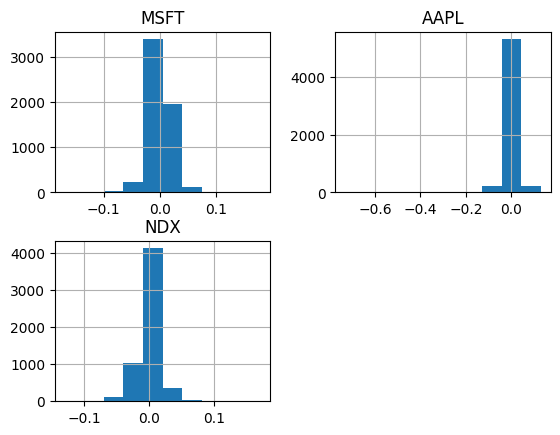

In [267]:
hist = data.hist(bins=10)

<AxesSubplot: >

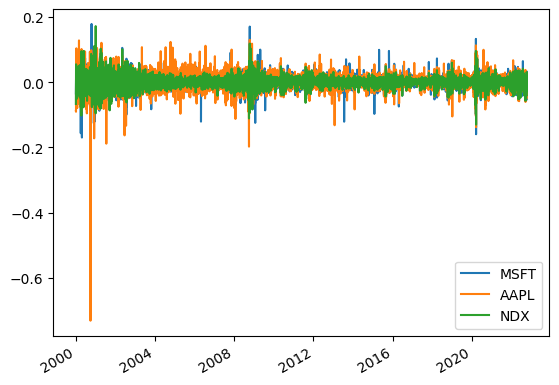

In [268]:
data.plot()

Here one apparent anomaly is seen in the plot of the log return of the AAPL closing price. It seems to have happened around 2002 which coincides with the exact month of October 2002 when the Dotcom bubble burst. After researching I learnt that Apple stock price dropped dramatically as it can be seen on the graph.

The plots seem to overlap with one another meaning there is at least some correlation between the log returns of the stock closings. 

Since we are working with timeseries data which is notorious for not being distributed normally (also apparent in the histograms) we have to find another way to test the correlation of the closing prices. I decided to use Spearman rank correlation method since we already transformed our series to their log-returns.

In [269]:
data.corr(method='spearman')

,MSFT,AAPL,NDX
MSFT,1.000000,0.504894,0.738211
AAPL,0.504894,1.000000,0.700415
NDX,0.738211,0.700415,1.000000


AAPL and MSFT seem to have postiive and somewhat strong correlations with NDX. This might be a result of NDX being an index and AAPL and MSFT being large parts of the NDX index. MSFT and AAPL are positively correlated but the strength of the correlation is weaker in contrast to the former ones.